In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [45]:
data = pd.read_csv("training data.csv")
data.set_index("PDB codes",inplace=True)
data = (data-data.min())/(data.max()-data.min())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

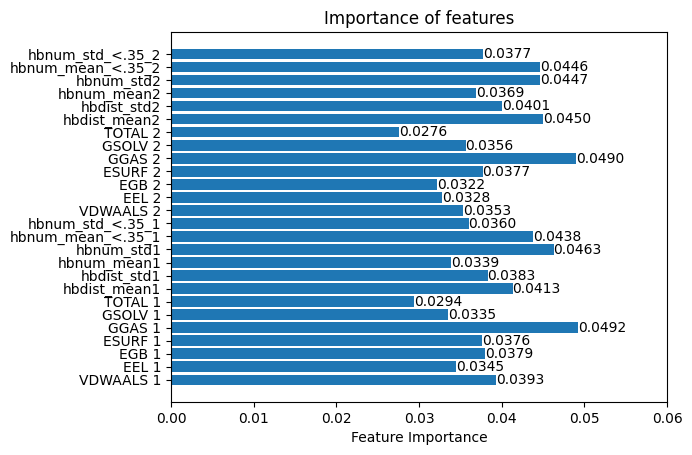

,Feature,importance
19,TOTAL 2,0.027606
6,TOTAL 1,0.029380
15,EGB 2,0.032185
14,EEL 2,0.032761
5,GSOLV 1,0.033469
9,hbnum_mean1,0.033880
1,EEL 1,0.034467
13,VDWAALS 2,0.035288
18,GSOLV 2,0.035614
12,hbnum_std_<.35_1,0.035987


In [46]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=22,random_state=50)
rf.fit(data.iloc[:,:-1],data["Output"])

features = list(data.keys())[:-1]
y_pos = np.arange(len(features))
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, rf.feature_importances_, align='center')
ax.set_yticks(y_pos, labels=features)
ax.set_xlabel('Feature Importance')
ax.set_title('Importance of features')

ax.bar_label(hbars, fmt='%.4f')
ax.set_xlim(right=0.06)  # adjust xlim to fit labels

plt.show()

df = pd.DataFrame({"Feature":features,"importance":rf.feature_importances_})
df.sort_values('importance',inplace=True)
df

In [47]:
feature_list = [df['Feature'].values[i:] for i in range(len(df.values))]

In [48]:
# lets continually remove the least important feature and see how it affects the performance of different models
def evaluate(model,feature_list):
    val_acc = []
    train_acc = []
    num_features = []
    for features in feature_list:
        cv_score = model_selection.cross_validate(model,data[features],data["Output"],cv=5,return_train_score=True)
        val_acc.append(np.mean(cv_score["test_score"]))
        train_acc.append(np.mean(cv_score["train_score"]))
        num_features.append(len(features))

    plt.plot(num_features,val_acc,label = 'validation accuracy')
    plt.plot(num_features,train_acc, label = 'training accuracy')
    plt.xlabel("number of features")
    plt.ylabel("train/validation accuracy")
    plt.legend()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

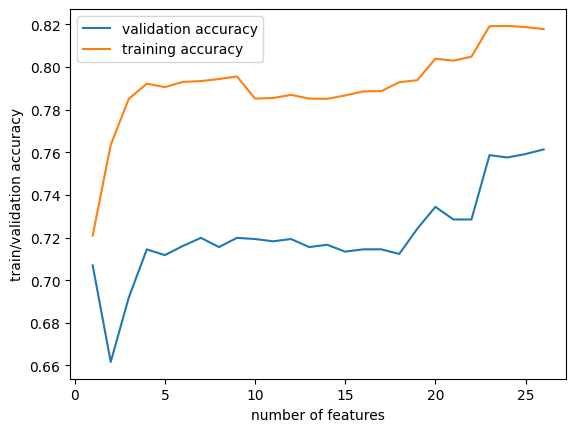

In [49]:
# list features from least importance to most importance
knn = KNeighborsClassifier(7)
evaluate(knn,feature_list)

In [53]:
def generate_csv(num_features):
    rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=22,random_state=50)
    rf.fit(data.iloc[:,:-1],data["Output"])
    feature_list = [df['Feature'].values[i:] for i in range(len(df.values))]
    data[feature_list[26-num_features]].to_csv("training data(random forest fs).csv")

In [54]:
generate_csv(20)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py